In [ ]:
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D,Dropout
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import os
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
!unzip "/content/face-mask-dataset.zip"
!unzip "/content/Dataset/train.zip"
!unzip "/content/Dataset/test.zip"

In [ ]:
train_path="/content/train/"
test_path="/content/test/"
train_Labels=[]
test_Labels=[]
train_imgs=[]
test_imgs=[]

for i,path in enumerate(os.listdir(train_path)):
  
  for img in os.listdir(train_path+path):
    train_Labels.append([i,(i+1)%2])
    image=load_img(os.path.join(train_path+path,img),target_size=(200,200))
    image=img_to_array(image)
    image=preprocess_input(image)
    train_imgs.append(image)
  print(i)
  print(path)




for i,path in enumerate(os.listdir(test_path)):
  
  for img in os.listdir(test_path+path):
    test_Labels.append([i,(i+1)%2])
    image=load_img(os.path.join(test_path+path,img),target_size=(200,200))
    image=img_to_array(image)
    image=preprocess_input(image)
    test_imgs.append(image)
  print(i)
  print(path)



0
without_mask
1
with_mask
0
without_mask
1
with_mask


In [ ]:
# convert the data and labels to NumPy arrays
train_imgs = np.array(train_imgs, dtype="float32")
train_Labels = np.array(train_Labels)

test_imgs = np.array(test_imgs, dtype="float32")
test_Labels = np.array(test_Labels)



In [ ]:
#data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
model =Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Epochs=10
batch=20
H = model.fit(
	aug.flow(train_imgs, train_Labels, batch_size=batch),
	validation_data=(test_imgs, test_Labels),
	epochs=Epochs,shuffle=True)

Epoch 1/10
66/66 [==============================] - 114s 2s/step - loss: 0.4447 - acc: 0.8167 - val_loss: 0.1342 - val_acc: 0.9639
Epoch 2/10
66/66 [==============================] - 114s 2s/step - loss: 0.2345 - acc: 0.9186 - val_loss: 0.0422 - val_acc: 0.9845
Epoch 3/10
66/66 [==============================] - 113s 2s/step - loss: 0.1850 - acc: 0.9407 - val_loss: 0.0361 - val_acc: 0.9948
Epoch 4/10
66/66 [==============================] - 113s 2s/step - loss: 0.1313 - acc: 0.9597 - val_loss: 0.0213 - val_acc: 0.9897
Epoch 5/10
66/66 [==============================] - 112s 2s/step - loss: 0.1513 - acc: 0.9475 - val_loss: 0.0224 - val_acc: 1.0000
Epoch 6/10
66/66 [==============================] - 113s 2s/step - loss: 0.1510 - acc: 0.9445 - val_loss: 0.0377 - val_acc: 0.9897
Epoch 7/10
66/66 [==============================] - 112s 2s/step - loss: 0.1174 - acc: 0.9605 - val_loss: 0.0202 - val_acc: 0.9948
Epoch 8/10
66/66 [==============================] - 113s 2s/step - loss: 0.1508 - a

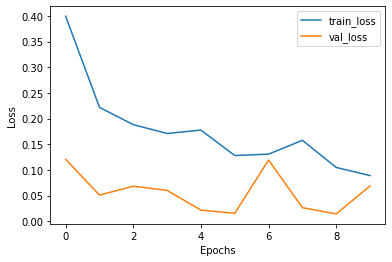

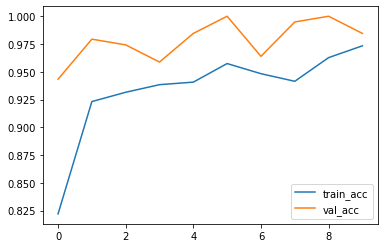

In [ ]:
plt.figure(1)
plt.plot(np.arange(0, Epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, Epochs), H.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")

plt.figure(2)
plt.plot(np.arange(0,Epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, Epochs), H.history["val_acc"], label="val_acc")
plt.legend(loc="best")

In [ ]:
#Save the model
model.save('MaskModel.h5')